In [23]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
reg = LinearRegression()
kf = KFold(n_splits=10, shuffle=True)

In [97]:
daily = pd.read_csv('./data/daily.csv')
daily_21 = pd.read_csv('./data/daily_21.csv')
daily_22 = pd.read_csv('./data/daily_22.csv')

In [98]:
daily.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
daily = daily.set_index('date')
daily.index = pd.to_datetime(daily.index)

daily_21.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
daily_21 = daily_21.set_index('date')
daily_21.index = pd.to_datetime(daily_21.index)

daily_22.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
daily_22 = daily_22.set_index('date')
daily_22.index = pd.to_datetime(daily_22.index)

daily['volumeto'] = daily['volumeto'].map(lambda x: '{:.0f}'.format(x))
daily['volumeto'] = daily['volumeto'].astype('int64')

In [99]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

mm_scaler.fit(daily[['volumeto']])

daily['vol_mm'] = mm_scaler.transform(daily[['volumeto']])

In [103]:
# add column for binned daily comment volume
daily['binned_count'] = pd.cut(daily['count'], bins=[-np.inf, 0, 10, 100, 250, 500, 1000, 2000, np.inf], labels=False)

In [113]:
daily['binned_count'].value_counts()

1    148
2    125
3    102
4     57
5     48
0     36
6     18
7     12
Name: binned_count, dtype: int64

In [100]:
daily

,count,close,volumeto,log_ret,returns,compound,comp_score,vol_mm
date,,,,,,,,
2021-01-01,3.0,0.1756,1350045,-0.002275,-0.002273,0.437800,1.000000,0.000813
2021-01-02,1.0,0.2931,23763413,0.512305,0.669134,0.802000,1.000000,0.023708
2021-01-03,29.0,0.3637,97862429,0.215816,0.240873,0.056817,0.448276,0.099397
2021-01-04,37.0,0.4818,222310323,0.281200,0.324718,0.130405,0.513514,0.226517
2021-01-05,63.0,0.4055,104100745,-0.172408,-0.158364,0.387659,0.746032,0.105770
...,...,...,...,...,...,...,...,...
2022-06-26,85.0,0.4067,3335931,0.012370,0.012447,0.307705,0.694118,0.002841
2022-06-27,101.0,0.3882,4177080,-0.046555,-0.045488,0.371528,0.702970,0.003701
2022-06-28,89.0,0.3894,4536444,0.003086,0.003091,0.340151,0.685393,0.004068


In [101]:
daily.describe()

,count,close,volumeto,log_ret,returns,compound,comp_score,vol_mm
count,546.000000,546.000000,5.460000e+02,546.000000,546.000000,546.000000,546.000000,546.000000
mean,251.838828,0.788134,3.019910e+07,0.001403,0.005919,0.265738,0.613784,0.030281
std,550.226585,0.656790,7.531791e+07,0.093139,0.100103,0.180187,0.304289,0.076935
min,0.000000,0.175600,5.541910e+05,-0.431903,-0.350728,-0.483800,-1.000000,0.000000
25%,5.000000,0.398325,5.775454e+06,-0.046551,-0.045484,0.201805,0.545907,0.005333
50%,42.000000,0.549050,1.105114e+07,-0.001679,-0.001678,0.255670,0.636364,0.010722
75%,242.750000,0.881450,2.408245e+07,0.037609,0.038325,0.330611,0.750000,0.024033
max,5279.000000,3.413000,9.795354e+08,0.512305,0.669134,0.992200,1.000000,1.000000


<AxesSubplot:>

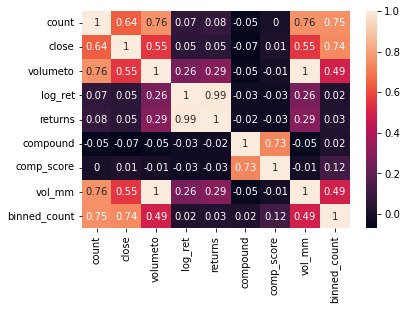

In [104]:
# Correlation matrix
corr_matrix = daily.corr(method = 'pearson').round(2)
sns.heatmap(corr_matrix, annot=True)

<AxesSubplot:>

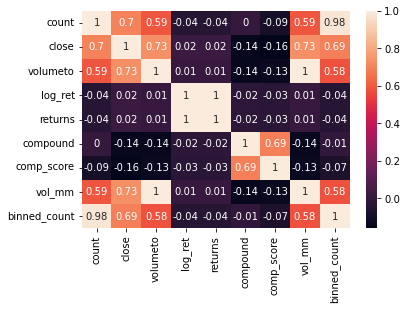

In [105]:
# Correlation matrix
corr_matrix = daily.corr(method = 'spearman').round(2)
sns.heatmap(corr_matrix, annot=True)

In [106]:
# covariance of daily comment volume and closing price
cov = np.cov(daily['count'], daily['close'])
print(cov)

[[3.02749295e+05 2.32269519e+02]
 [2.32269519e+02 4.31373311e-01]]


In [11]:
# covariance of daily comment volume and volume of LRC being trader
cov = np.cov(daily['count'], daily['volumeto'])
print(cov)

[[3.02557573e+05 3.15274719e+10]
 [3.15274719e+10 5.67278815e+15]]


In [12]:
# covariance of binned daily comment volume and closing price
cov = np.cov(daily['binned_count'], daily['close'])
print(cov)

[[2.76421682 0.81127474]
 [0.81127474 0.43137331]]


In [13]:
# covariance of binned daily comment volume and volume of LRC being trader
cov = np.cov(daily['binned_count'], daily['volumeto'])
print(cov)

[[2.76421682e+00 6.10521593e+07]
 [6.10521593e+07 5.67278815e+15]]


<AxesSubplot:xlabel='date', ylabel='close'>

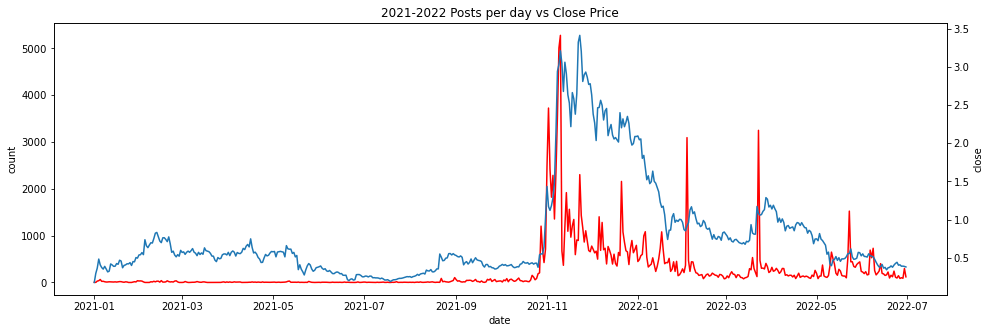

In [107]:
# Number of comments per day vs daily close price of LRC in 2021-22
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(x=daily.index, y="count", data=daily, color="r", ax=ax).set(title='2021-2022 Posts per day vs Close Price')
ax2 = ax.twinx()
sns.lineplot(x=daily.index, y="close", data=daily, ax=ax2)

<AxesSubplot:xlabel='date', ylabel='close'>

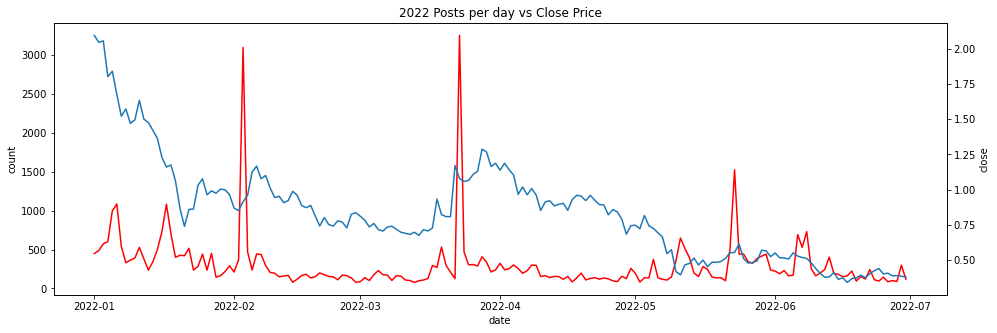

In [108]:
# Number of comments per day and daily close price of LRC in 2022
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(x=daily_22.index, y="count", data=daily_22, color="r", ax=ax).set(title='2022 Posts per day vs Close Price')
ax2 = ax.twinx()
sns.lineplot(x=daily_22.index, y="close", data=daily_22, ax=ax2)

<AxesSubplot:xlabel='date', ylabel='volumeto'>

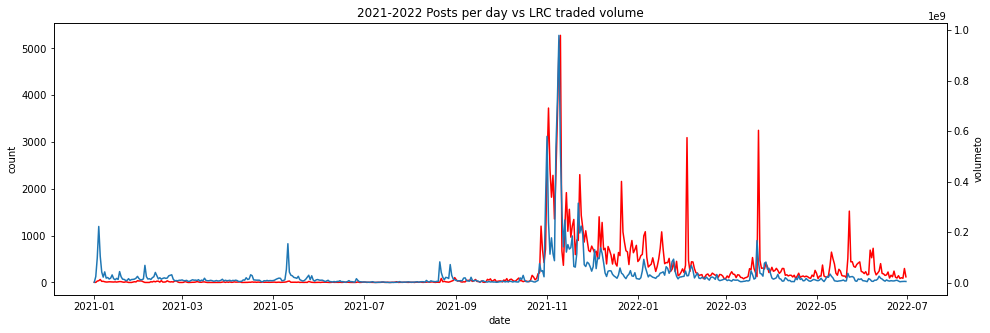

In [109]:
# Nmber of comments per day and daily traded volume of LRC in 2021-22
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(x=daily.index, y="count", data=daily, color="r", ax=ax).set(title='2021-2022 Posts per day vs LRC traded volume')
ax2 = ax.twinx()
sns.lineplot(x=daily.index, y="volumeto", data=daily, ax=ax2)

<AxesSubplot:xlabel='date', ylabel='volumeto'>

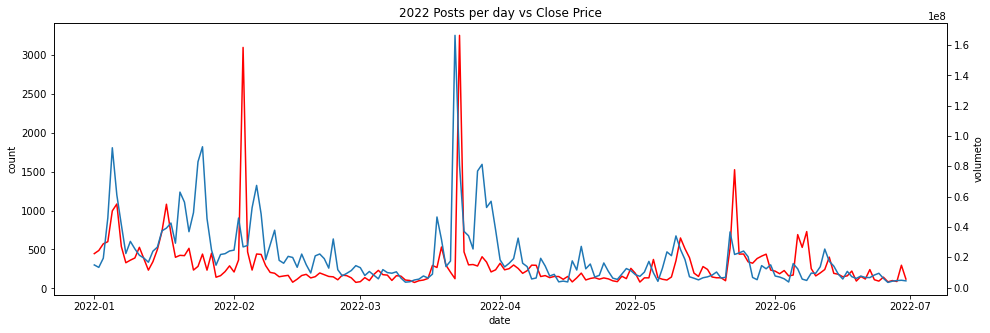

In [19]:
# Number of comments per day and daily volume traded of LRC in 2022
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(x=daily_22.index, y="count", data=daily_22, color="r", ax=ax).set(title='2022 Posts per day vs Close Price')
ax2 = ax.twinx()
sns.lineplot(x=daily_22.index, y="volumeto", data=daily_22, ax=ax2)

## Linear Regression

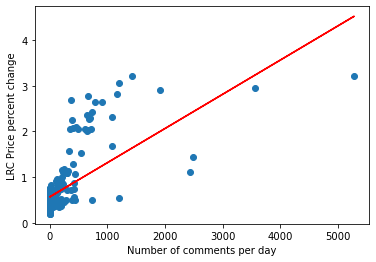

Coefficients:  [0.00074717]
Mean squared error: 0.30
Coefficient of determination: 0.43
Cross-validation results:  [0.44637583 0.37800627 0.07156595 0.34701864 0.54040539 0.52443145
 0.32204639 0.40561105 0.16741968 0.40761131]
CV mean:  0.361049194453229
CV standard deviation:  0.13913855870672132


In [125]:
# Linear regression on daily 2021-2022 data
X = daily['count'].values.reshape(-1, 1)
y = daily['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title("")
plt.ylabel("LRC Price percent change")
plt.xlabel("Number of comments per day")
plt.show()

print("Coefficients: ", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# cross-validation
cv_results = cross_val_score(reg, X, y, cv=kf)

# cross-validation
print("Cross-validation results: ", cv_results)
print("CV mean: ", np.mean(cv_results))
print("CV standard deviation: ", np.std(cv_results))

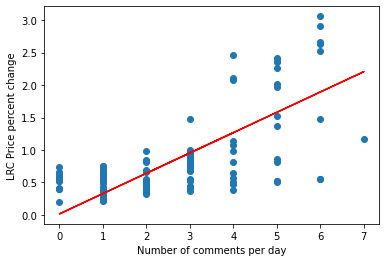

Coefficients:  [0.31311718]
Mean squared error: 0.20
Coefficient of determination: 0.41
Cross-validation results:  [-0.57352017  0.51219116  0.57429485  0.627033    0.5411276   0.30101286
  0.57982513  0.50008058  0.51947222  0.62258246]
CV mean:  0.42040996833257704
CV standard deviation:  0.3426325442013719


In [126]:
# Linear regression on daily 2021-2022 data
X = daily['binned_count'].values.reshape(-1, 1)
y = daily['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title("")
plt.ylabel("LRC Price percent change")
plt.xlabel("Number of comments per day")
plt.show()

print("Coefficients: ", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# cross-validation
cv_results = cross_val_score(reg, X, y, cv=kf)

# cross-validation
print("Cross-validation results: ", cv_results)
print("CV mean: ", np.mean(cv_results))
print("CV standard deviation: ", np.std(cv_results))

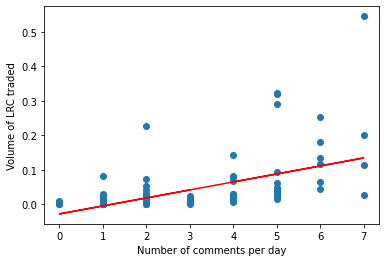

Coefficients:  [0.02320215]
Mean squared error: 0.00
Coefficient of determination: 0.27
Cross-validation results:  [-0.43089027  0.33865523  0.24127827  0.26935811  0.32475066 -0.39534821
 -1.58508635  0.16950619  0.20125823  0.28920349]
CV mean:  -0.057731465507028415
CV standard deviation:  0.5766221790449665


In [128]:
# Linear regression on daily 2021-2022 data
X = daily['binned_count'].values.reshape(-1, 1)
y = daily['vol_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title("")
plt.ylabel("Volume of LRC traded")
plt.xlabel("Number of comments per day")
plt.show()

print("Coefficients: ", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# cross-validation
cv_results = cross_val_score(reg, X, y, cv=kf)

# cross-validation
print("Cross-validation results: ", cv_results)
print("CV mean: ", np.mean(cv_results))
print("CV standard deviation: ", np.std(cv_results))